# importing libraries

In [88]:
from pandas import Series,DataFrame
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
import statistics
from scipy import stats

In [2]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,mean_squared_error
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures 

In [107]:
from statsmodels.formula.api import ols

In [3]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

# importing data

In [4]:
df=pd.read_csv("responses.csv")
df.head(1)

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats


# function_box

In [5]:
def replacer_mean(dff):
    r0=np.mean(df1)
    r1=r0.index
    r2=r0.values
    for i in np.arange(len(r1)):
          ri=r1[i]
          rv=r2[i]
          dff[ri].fillna(value=rv)
          dff.replace([np.inf,-np.inf],rv)
    return(dff)

def nan_remover(v,vm):
    vr=[]
    for i in np.arange(len(v)):
        if str(v[i])=="nan":
            vr=np.append(vr,vm)
        else:
            vr=np.append(vr,v[i])
    return(vr)

def replacer_mean(dff):
    dff1=dff
    r0=np.mean(dff)
    r1=r0.index
    r2=r0.values
    for i in np.arange(len(r1)):
          ri=r1[i]
          rv=r2[i]
          dff1[ri].fillna(value=rv)
          dff1[ri]=(nan_remover(dff[ri].values,rv))
    return(dff1)

def numriser(a):
    a1=[]
    for i in np.arange(len(a)):
        a1=np.append(a1,round(a[i]))
    return(a1)

def pie_plotter(var):
    dfm=pd.get_dummies(df[var])
    sm=(dfm.sum())
    #plt.subplot(2, 1, 1)
    #sm.plot(kind="pie",figsize=(10,10),fontsize=10,title=var,table=True)
    #plt.subplot(2, 1, 2)
    df1[var].plot(figsize=(10,10),kind="kde")

def bi_var(var1,var2,dff):

    sns.lmplot(var1,var2,dff,order=1,scatter=False,
           scatter_kws={"marker":"o","color":"red"},
              line_kws={"linewidth":1,"color":"blue"})
    r=np.corrcoef(dff[var1],dff[var2])[0,1]
    print("correlation_coef between",var1,"and",var2,"is",r)

def counter(m):
    u=[1,2,3,4,5]
    n=len(m)
    s1=[]
    for i in u:
        s=0
        for j in np.arange(n):
            if i==m[j]:
                s=s+1
        s1=np.append(s1,s)
    return(s1)

def counter2(m):
    u=np.unique(m)
    n=len(m)
    s1=[]
    for i in u:
        s=0
        for j in np.arange(n):
            if i==m[j]:
                s=s+1
        s1=np.append(s1,s)
    s11=DataFrame(s1,index=u).T
    return(s11)

def dpie_plotter(var,al):
    labels1=np.unique(df_r[al])
    labels=labels1[::-1] 
    dfm=pd.get_dummies(df1[var],columns=labels)
    sm=(dfm.sum())
    plt.subplot(2, 1, 1)
    sm.plot(kind="pie",figsize=(10,10),fontsize=10,title="Training data set",table=True,autopct='%1.1f%%')
    plt.subplot(2, 1, 2)
    dfm=pd.get_dummies(df_r2[var],columns=labels)
    sm1=(dfm.sum())
    sm1.plot(kind="pie",figsize=(10,10),fontsize=10,title="Response data set",table=True,autopct='%1.1f%%')
    plt.legend(labels, loc="best")

def happiness(n):
    for i in np.arange(len(dfr_pre["Name"].values)):
        if dfr_pre["Name"][i]==n:
            hpp=dfr_pre["index of happiness"][i]
        if dfr_pre["Name"][i]==n:
            hpi=dfi_pre["index of happiness"][i]
    if hpp==1:
        hpr="you are really not happy and your index of happiness is "
    elif hpp==2:
        hpr="you are not very much happy and your index of happiness is "
    else:
        hpr="you are very happy and your index of happiness is "
    print(n,hpr,hpi,".")

# subsetting_data

In [6]:
y=df["Happiness in life"]

In [7]:
df1=df[["Dance","Shopping","Fun with friends","Parents' advice","Eating to survive",
    "Pets","Darkness","Fear of public speaking","Smoking","Alcohol","Economy Management","Healthy eating",
        "Decision making","Workaholism","Friends versus money","Loneliness",
   "God","Dreams","Number of friends","Socializing","Entertainment spending","Age","Height","Weight",
   "Gender","Only child","Village - town","Internet usage"]]

In [8]:
df1.head(1)

,Dance,Shopping,Fun with friends,Parents' advice,Eating to survive,Pets,Darkness,Fear of public speaking,Smoking,Alcohol,...,Number of friends,Socializing,Entertainment spending,Age,Height,Weight,Gender,Only child,Village - town,Internet usage
0,2.0,4.0,5.0,4.0,1,4.0,1.0,2.0,never smoked,drink a lot,...,3,3.0,3.0,20.0,163.0,48.0,female,no,village,few hours a day


In [9]:
df_music=(df[df.columns[0:19]])
music=numriser(np.mean(df_music.T))
df_movies=(df[df.columns[19:33]])
movies=numriser(np.mean(df_movies.T))

edu=[]
for i in (df["Education"].values):
    if i=="secondary school":
        edu=np.append(edu,1)
    elif i=="masters degree":
        edu=np.append(edu,2)
    elif i=="college/bachelor degree":
        edu=np.append(edu,3)
    elif i=="doctorate degree":
        edu=np.append(edu,4)
    else:
        edu=np.append(edu,5)

In [10]:
a7=[]
for i in np.arange(len(df1["Height"])):
    a17=df1["Height"][i]/df1["Weight"][i]
    a7=np.append(a7,a17)

from sklearn import preprocessing
sc=preprocessing.MinMaxScaler(feature_range=(1,5))
a8=sc.fit_transform(df1["Age"].values.reshape(-1,1))

a1=[]
for i in df1["Gender"].values:
    if i=="female":
        a1=np.append(a1,0)
    else:
        a1=np.append(a1,1)

a2=[]
for i in df1["Only child"].values:
    if i=="no":
        a2=np.append(a2,0)
    else :
        a2=np.append(a2,1)

a3=[]
for i in df1["Village - town"].values:
    if i=="village":
        a3=np.append(a3,1)
    else:
        a3=np.append(a3,0)

a4=[]
for i in df1["Internet usage"].values:
    if i=="few hours a day":
        a4=np.append(a4,0)
    elif i=="less than an hour a day":
        a4=np.append(a4,1)
    else :
        a4=np.append(a4,2)

a5=[]
for i in df1["Smoking"].values:
    if i=="never smoked":
        a5=np.append(a5,0)
    elif i=="tried smoking":
        a5=np.append(a5,1)
    elif i=="former smoker":
        a5=np.append(a5,2)
    else:
        a5=np.append(a5,3)

a6=[]
for i in df1["Alcohol"]:
    if i=="drink a lot":
        a6=np.append(a6,0)
    elif i=="social drinker":
        a6=np.append(a6,1)
    else:
        a6=np.append(a6,2)

df1["hw_rat"]=a7
df1["age"]=a8
df1["gender"]=a1
df1["alcohol"]=a6
df1["smoke"]=a5
df1["only_child"]=a2
df1["area"]=a3
df1["internet"]=a4
df1["music"]=music
df1["movie"]=movies
df1["education"]=edu

df1=df1.drop(["Height","Weight","Age","Gender","Only child","Internet usage","Smoking","Village - town","Alcohol"],axis=1)


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

# removing NA and NAN values

In [11]:
dfy=DataFrame(y)
dfy=dfy.fillna(value=np.mean(y))
dfy=DataFrame(nan_remover(dfy["Happiness in life"].values,np.mean(y)))

In [12]:
r0=(np.mean(df1))
r1=r0.index
r2=r0.values

In [13]:
df2=df1
df1=replacer_mean(df2)

# training of data

In [14]:
x1=df1.values

In [15]:
y1=dfy.values

In [16]:
y2=[]
for i in np.arange(len(y1)):
    if (y1[i]<2.5):
        y2=np.append(y2,1)
    elif (y1[i]>3.5):
        y2=np.append(y2,3)
    else:
        y2=np.append(y2,2)

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x1,y2,test_size=0.33,random_state=42)

In [18]:
model_xg=xgb.XGBClassifier(base_score=0.5, 
                           booster='dart', 
                           colsample_bylevel=1,
                           colsample_bynode=1, 
                           colsample_bytree=.4,
                           gamma=0.2,
                           importance_type='gain', 
                           learning_rate=0.1, 
                           max_delta_step=0,
                           max_depth=2, min_child_weight=3, missing=None, n_estimators=100,
                           n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
                           reg_alpha=.2, reg_lambda=1, scale_pos_weight=1, seed=None,
                           silent=None, subsample=1, verbosity=1)

In [19]:
model_xg.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.4, gamma=0.2,
       learning_rate=0.1, max_delta_step=0, max_depth=2,
       min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0.2, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [20]:
y_pre=model_xg.predict(x_train)
accuracy_score(numriser(DataFrame(y_pre)[0].values),(numriser(DataFrame(y_train)[0].values)))

0.7588757396449705

In [21]:
y_pre1=model_xg.predict(x_test)
accuracy_score(numriser(DataFrame(y_pre1)[0].values),(numriser(DataFrame(y_test)[0].values)))

0.7035928143712575

In [22]:
df_pre1=DataFrame([numriser(DataFrame(y_pre1)[0].values),DataFrame(y_test)[0].values],index=["predicted","observed"]).T
df_pre1.head(2)

,predicted,observed
0,3.0,3.0
1,3.0,2.0


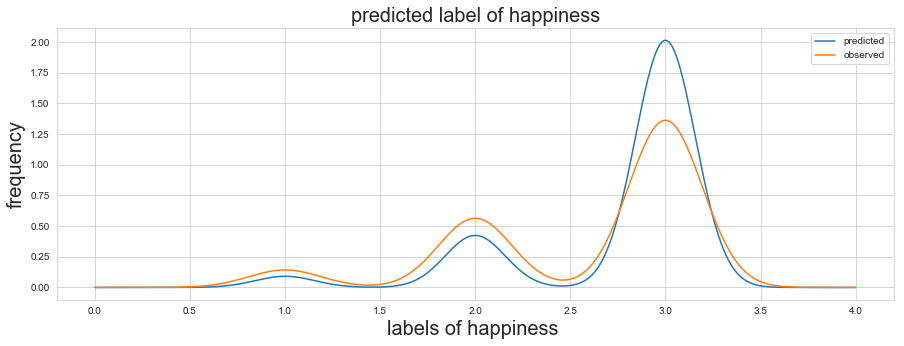

In [23]:
df_pre1["predicted"].plot(kind="kde",label=True,figsize=(15,5),alpha=1)
df_pre1["observed"].plot(kind="kde",label=True,figsize=(15,5),alpha=1)
plt.title("predicted label of happiness",fontsize=20)
plt.xlabel("labels of happiness ",fontsize=20)
plt.ylabel("frequency",fontsize=20)
plt.legend(["predicted","observed"])

# before importing the resposnes data file one neads to train upon the whole data set

In [24]:
model_xg.fit(x1,y2)

XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.4, gamma=0.2,
       learning_rate=0.1, max_delta_step=0, max_depth=2,
       min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0.2, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [25]:
y_pre1=model_xg.predict(x1)

In [26]:
accuracy_score(numriser(DataFrame(y_pre1)[0].values),(numriser(DataFrame(y2)[0].values)))

0.7366336633663366

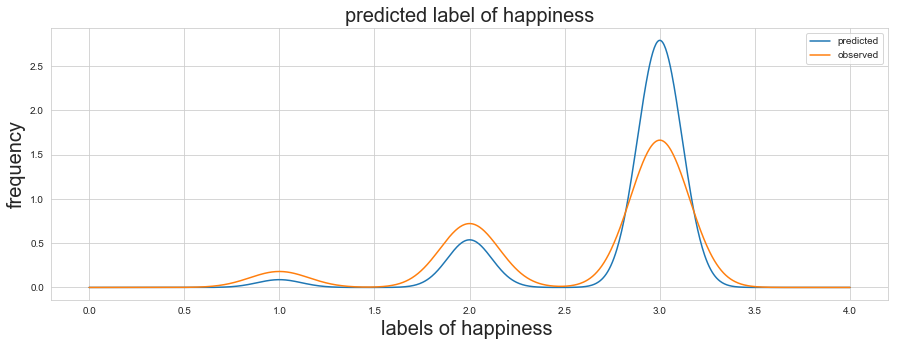

In [27]:
df_pre1=DataFrame([numriser(DataFrame(y_pre1)[0].values),DataFrame(y2)[0].values],index=["predicted","observed"]).T
df_pre1["predicted"].plot(kind="kde",label=True,figsize=(15,5),alpha=1)
df_pre1["observed"].plot(kind="kde",label=True,figsize=(15,5),alpha=1)
plt.title("predicted label of happiness",fontsize=20)
plt.xlabel("labels of happiness ",fontsize=20)
plt.ylabel("frequency",fontsize=20)
plt.legend(["predicted","observed"])

# importing response sheet 

In [28]:
df_r=pd.read_csv("Responses11.csv")
#df_r=df_r.drop("Unnamed: 35",axis=1)
df_r.tail(2)

,Timestamp,Name,"Comments about yourself (Hostel room number, Class, Department etc.)",Your email id,Age,Height (in feet),Weight (in kgs),Sex,Are you the only child of your parents?,Where did you spend most of you childhood?,...,How confident are you in taking important Decisions?,Are you a workaholic?,"Which one is more important, friends or money?",How lonely are you?,Your belief in God,How often do you see dreams?,Do you have a lot of close friends?,How much do you socialize with others ?,Level of your spending on Entertainment,Internet usage in a day.
78,19-03-2020 10:13,Sudhanshu Ranjan,Dst,sudhanshuranjan022@gmail.com,22.0,5.4,60,Male,No,City,...,1,5,2,1,1,1,1,1,1,More than an hour but less than 4 hours
79,19-03-2020 10:15,Sr,Sr,Sr,23.0,5.4,50,Male,No,City,...,1,5,1,1,1,1,1,1,1,More than 4 hours


In [29]:
df_r1=df_r[["Timestamp","Name","Comments about yourself (Hostel room number, Class, Department etc.) ","Your email id"]]
df_r2=df_r.drop(["Timestamp","Name","Comments about yourself (Hostel room number, Class, Department etc.) ","Your email id"],axis=1)

In [30]:
h=[]
for i in np.arange(len(df_r2["Height (in feet)"])):
    h=np.append(h,(df_r2["Height (in feet)"][i]*30.48))

In [31]:
edu=[]
for i in (df_r2["Highest level of education attained?"].values):
    if i=="Secondary school":
        edu=np.append(edu,1)
    elif i=="Masters degree":
        edu=np.append(edu,2)
    elif i=="Secondary school":
        edu=np.append(edu,3)
    elif i=="Doctorate degree":
        edu=np.append(edu,4)
    else:
        edu=np.append(edu,5)

In [32]:
a7=[]
for i in np.arange(len(df_r2["Weight (in kgs)"])):
    a17=h[i]/df_r2["Weight (in kgs)"][i]
    a7=np.append(a7,a17)

from sklearn import preprocessing
sc=preprocessing.MinMaxScaler(feature_range=(1,5))
a8=sc.fit_transform(df_r2["Age"].values.reshape(-1,1))

a1=[]
for i in df_r2["Sex"].values:
    if i=="Female":
        a1=np.append(a1,0)
    else:
        a1=np.append(a1,1)

a2=[]
for i in df_r2["Are you the only child of your parents?"].values:
    if i=="No":
        a2=np.append(a2,0)
    else :
        a2=np.append(a2,1)

a3=[]
for i in df_r2["Where did you spend most of you childhood?"].values:
    if i=="Village":
        a3=np.append(a3,1)
    else:
        a3=np.append(a3,0)

a4=[]
for i in df_r2["Internet usage in a day."].values:
    if i=="More than an hour but less than 4 hours":
        a4=np.append(a4,0)
    elif i=="More than 4 hours":
        a4=np.append(a4,2)
    else :
        a4=np.append(a4,1)

a5=[]
for i in df_r2["Do you smoke?"].values:
    if i=="Never smoked":
        a5=np.append(a5,0)
    elif i=="Tried smoking":
        a5=np.append(a5,1)
    elif i=="Former smoker":
        a5=np.append(a5,2)
    else:
        a5=np.append(a5,3)

a6=[]
for i in df_r2["Level of alcohol consumption."]:
    if i=="Drink a lot":
        a6=np.append(a6,0)
    elif i=="Social drinker":
        a6=np.append(a6,1)
    else:
        a6=np.append(a6,2)

df_r2["hw_rat"]=a7
df_r2["age"]=a8
df_r2["gender"]=a1
df_r2["alcohol"]=a6
df_r2["smoke"]=a5
df_r2["only_child"]=a2
df_r2["area"]=a3
df_r2["internet"]=a4
df_r2["education"]=edu

df_r2=df_r2.drop(["Weight (in kgs)","Age","Sex","Are you the only child of your parents?","Internet usage in a day.","Do you smoke?","Where did you spend most of you childhood?","Level of alcohol consumption."],axis=1)
df_r2=df_r2.drop(["Highest level of education attained?"],axis=1)

In [33]:
df_r2=df_r2.drop(["Height (in feet)"],axis=1)

In [34]:
r0=(np.mean(df_r2))
r1=r0.index
r2=r0.values

In [35]:
df_r21=df_r2
df_r2=replacer_mean(df_r21)

# predicting the responses

In [36]:
model_xg

XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.4, gamma=0.2,
       learning_rate=0.1, max_delta_step=0, max_depth=2,
       min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0.2, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [37]:
xr=df_r2.values

In [38]:
yr_pre=model_xg.predict(xr)
dfr_pre=DataFrame([df_r1["Name"].values,yr_pre],index=["Name","index of happiness"]).T
dfr_pre[0:5]

,Name,index of happiness
0,Bharat kurde,2
1,SHIVAM KUMAR GUPTA,3
2,Sneha Rao,3
3,Ankit Pratap Singh,1
4,Nancy yadav,3


# A bayesian approach to improve my model

In [39]:
t11=((df1).describe()).T["mean"].values        #searching for prior
t22=((df_r2).describe()).T["mean"].values
t1=(t11+t22)/2

In [40]:
#np.corrcoef(df1["music"],df1["movie"])[0,1]
df1["y"]=y1

In [41]:
t44=(df2.corr()["y"].values[:-1])

In [42]:
df1=df1.drop("y",axis=1)

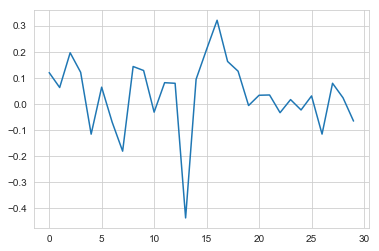

In [43]:
#sns.kdeplot(t11)
#sns.kdeplot(t22)
#sns.kdeplot(t1)
plt.plot(t44)

In [44]:
t22=(t44)

In [45]:
t22

array([ 0.12019862,  0.06307306,  0.19603548,  0.1211978 , -0.11544976,
        0.06433835, -0.06930623, -0.18060107,  0.14349554,  0.12813107,
       -0.03125441,  0.08153359,  0.07923903, -0.43605991,  0.09460867,
        0.20908083,  0.32054071,  0.16279441,  0.12550524, -0.0058829 ,
        0.03345017,  0.03450089, -0.03323027,  0.01685588, -0.02287633,
        0.03081225, -0.11526539,  0.07928801,  0.02366298, -0.06539079])

In [46]:
df11=df1*t22
x11=df11.values
y11=dfy.values*1

In [47]:
y22=[]
for i in np.arange(len(y11)):
    if (y11[i]<2.5):
        y22=np.append(y22,1)
    elif (y11[i]>3.5):
        y22=np.append(y22,3)
    else:
        y22=np.append(y22,2)

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x11,y22,test_size=0.33,random_state=42)
model_xg11=xgb.XGBClassifier(base_score=0.5, 
                           booster='dart', 
                           colsample_bylevel=1,
                           colsample_bynode=1, 
                           colsample_bytree=.4,
                           gamma=0.2,
                           importance_type='gain', 
                           learning_rate=0.1, 
                           max_delta_step=0,
                           max_depth=2, min_child_weight=3, missing=None, n_estimators=100,
                           n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
                           reg_alpha=.2, reg_lambda=1, scale_pos_weight=1, seed=None,
                           silent=None, subsample=1, verbosity=1)

model_xg11.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.4, gamma=0.2,
       learning_rate=0.1, max_delta_step=0, max_depth=2,
       min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0.2, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [49]:
y_pre=model_xg11.predict(x_train)
accuracy_score(numriser(DataFrame(y_pre)[0].values),(numriser(DataFrame(y_train)[0].values)))

0.7588757396449705

In [50]:
y_pre1=model_xg11.predict(x_test)
accuracy_score(numriser(DataFrame(y_pre1)[0].values),(numriser(DataFrame(y_test)[0].values)))

0.7035928143712575

In [51]:
#df_pre1

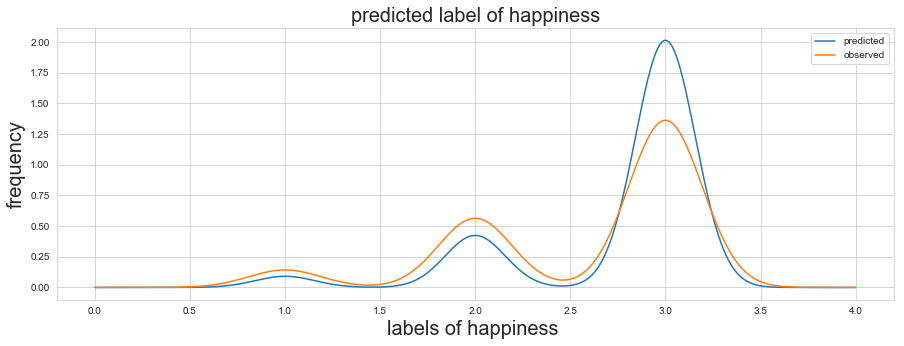

In [52]:
df_pre1=DataFrame([numriser(DataFrame(y_pre1)[0].values),DataFrame(y_test)[0].values],index=["predicted","observed"]).T
df_pre1["predicted"].plot(kind="kde",label=True,figsize=(15,5),alpha=1)
df_pre1["observed"].plot(kind="kde",label=True,figsize=(15,5),alpha=1)
plt.title("predicted label of happiness",fontsize=20)
plt.xlabel("labels of happiness ",fontsize=20)
plt.ylabel("frequency",fontsize=20)
plt.legend(["predicted","observed"])

In [53]:
yr_pre=model_xg11.predict(xr*t22)
dfr_pre=DataFrame([df_r1["Name"].values,yr_pre],index=["Name","index of happiness"]).T
dfr_pre.tail(4)

,Name,index of happiness
76,Chandra Prakash,3
77,Ranjeet,3
78,Sudhanshu Ranjan,1
79,Sr,1


In [54]:
dfr_pre.sort_values(by=["index of happiness"],ascending=True)[1:1]

,Name,index of happiness


In [55]:
dfr_pre.sort_values(by=["index of happiness"],ascending=False)[0:1]

,Name,index of happiness
0,Bharat kurde,3


In [56]:
from sklearn import preprocessing
sc=preprocessing.StandardScaler()
y33=sc.fit_transform(y1.reshape(-1,1))

In [57]:
model_xg3=LinearRegression(normalize=True)

In [58]:
model_xg3.fit(x11,y22)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [59]:
y_pre1=model_xg3.predict(x11)
accuracy_score(numriser(DataFrame(y_pre1)[0].values),(numriser(DataFrame(y22)[0].values)))

0.6574257425742575

In [60]:
yr_pre=model_xg3.predict(xr*t22)
dfi_pre=DataFrame([df_r1["Name"].values,yr_pre],index=["Name","index of happiness"]).T

In [61]:
dfi_pre.sort_values(by=["index of happiness"],ascending=False)[1:15]

,Name,index of happiness
32,Vivek kumar,3.0929
10,Dwaipayan Bhattacharya,3.05563
72,Krishnan,3.0497
42,DEEPANKER KUMAR,2.96826
27,Aparna Sethi,2.95159
68,XYZ,2.94703
6,Akshay,2.92314
25,Sreetama,2.91893
11,Nidhi kumari,2.91688
52,चिराग,2.88488


In [62]:
#dfi_pre.sort_values(by=["index of happiness"],ascending=False)[0:15]

In [63]:
#happiness("gaurav kumar gupta")

In [64]:
dfr_pre.sort_values(by=["index of happiness"],ascending=True)[1:16]

,Name,index of happiness
78,Sudhanshu Ranjan,1
15,Rituraj singh,1
46,Vishal kashyap,2
35,Shashank manojkumar singh,2
24,Simran,2
43,Boda Mahender,2
19,Ajit Raj,2
18,Pratyush Bhowmik,2
14,MAHESH KUMAR PANDEY,2
12,Sougata Seth,2


In [65]:
n=2                   #change the value  of n 
ind=np.where(dfr_pre["index of happiness"]==n)
for i in  ind:
    print(dfr_pre["Name"][i])

1            SHIVAM KUMAR GUPTA
3            Ankit Pratap Singh
12                 Sougata Seth
14          MAHESH KUMAR PANDEY
18             Pratyush Bhowmik
19                     Ajit Raj
24                       Simran
35    Shashank manojkumar singh
43                Boda Mahender
45            Arun Kumar Tiwary
46               Vishal kashyap
75                Ashish Mishra
Name: Name, dtype: object


In [66]:
happiness("Srijita Acharyya")

Srijita Acharyya you are very happy and your index of happiness is  2.682367685446977 .


In [67]:
happiness("Anchita Goswami")

Anchita Goswami you are very happy and your index of happiness is  2.7939638935970725 .


# post hoc analysis

In [80]:
#dfi_pre["index of happiness"]
for i in np.arange(len(df_r2["gender"].values)):
    if df_r2["gender"][i]=="0":
        s1=s1+df_r2["gender"][i]
f=np.where(df_r2["gender"]==0)
m=np.where(df_r2["gender"]==1)
fi=[]
mi=[]
for i in f:
    fi=np.append(fi,dfi_pre["index of happiness"][i])
for j in m:
    mi=np.append(mi,dfi_pre["index of happiness"][j])

In [87]:
f1=np.mean(fi)
m1=np.mean(mi)
s1=np.var(fi)
s2=np.var(mi)
n1=len(fi)
n2=len(mi)

In [91]:
t_cal=(m1-f1)/np.sqrt((s1/n1)+(s2/n2))

In [96]:
alpha=.05
t_tab=stats.t.ppf(1-alpha,n1+n2-2)

In [97]:
if t_cal>t_tab:
    print("Ho will be rejected")
else:
    print("we fail to reject the null hypothesis ")

we fail to reject the null hypothesis 


In [138]:
#this means males are significantly less happier then female
[m1,f1]

[2.5405358213644043, 2.6942427908690676]

In [117]:
a1=[]
a2=[]
a3=[]
for i in np.arange(len(df_r["Age"].values)):
    if df_r["Age"][i]<21:
        a1=np.append(a1,dfi_pre["index of happiness"][i])
    elif df_r["Age"][i]>25:
        a3=np.append(a3,dfi_pre["index of happiness"][i])
    else:
        a2=np.append(a2,dfi_pre["index of happiness"][i])

In [118]:
a1

array([2.38684889, 2.55096108, 2.80399188, 2.59896764, 3.04970061])

In [119]:
stats.f_oneway(a1,a2,a3)

F_onewayResult(statistic=0.5767752558713642, pvalue=0.5641147781878191)

In [ ]:
#so clearly at least one effect is signifcant

In [124]:
stats.ttest_ind(a1,a2,equal_var=False)

Ttest_indResult(statistic=0.5747200196071682, pvalue=0.5672476804814869)

In [125]:
stats.ttest_ind(a1,a3,equal_var=False)

Ttest_indResult(statistic=-0.4316188919383656, pvalue=0.6844743110886573)

In [126]:
stats.ttest_ind(a3,a2,equal_var=False)

Ttest_indResult(statistic=2.544179597538387, pvalue=0.02101437949940729)

In [ ]:
#so age group 21 to 25 (a2) is significantly less happier than other age group

In [130]:
[np.mean(a1),np.mean(a2),np.mean(a3)]

[2.678094019269161, 2.589635564301465, 2.730047221071572]